In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

# OLS 
import statsmodels.formula.api as smf
# VIF
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Q-Q plot
from scipy import stats
# Jarque-Bera
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
# Durbin-Watson
import statsmodels.stats.stattools as tools
# Breusch - Godfrey tset
import statsmodels.stats.diagnostic as sm_diagnostic
# 강건표준오차(자기상관)
import statsmodels.stats as sm_stats
# 램지테스트 (모형설정의오류)
import statsmodels.stats.outliers_influence as oi

In [95]:
# cap = pd.read_excel('PER.xlsx')
# emp = pd.read_excel('emp.xlsx')
# wti = pd.read_csv('wti-month.csv')
# kosdaq = pd.read_excel('kosdaq.xls')
# kospi = pd.read_excel('kospi.xlsx')

# ce = pd.merge(cap, emp )
# cew = pd.merge( ce , wti , left_index=True , right_index=True )
# cew_final =pd.merge ( cew , kosdaq , left_index=True , right_index=True)
# cew_final_2 = pd.merge( cew_final , kospi , left_index=True , right_index=True )
# cew_2 = pd.merge( ce , wti , left_index=True , right_index=True )
# # wti.describe()
# # wti.var()
# # emp.describe()
# # emp.var()
# # cap.describe()
# # cap.var()


# cew_final_2.corr()



In [181]:
cew = pd.read_excel('emp_data3.xlsx')
kospi = pd.read_excel('kospi.xlsx')
# cew['lnHiring']= np.log(cew['Hiring'])
# cew['Price_exper_']=cew['Price']**2

# cew.head(3)
# cew.describe().round(3)
# cew.corr().round(3)

cew.corr()

,Hiring,kosdaq,Price,Stock,PER
Hiring,1.000000,0.525851,0.584439,-0.060519,-0.500530
kosdaq,0.525851,1.000000,0.604034,0.141982,-0.466846
Price,0.584439,0.604034,1.000000,-0.217127,-0.504940
Stock,-0.060519,0.141982,-0.217127,1.000000,0.122584
PER,-0.500530,-0.466846,-0.504940,0.122584,1.000000


In [182]:
cew['lnHiring']= np.log(cew['Hiring'])
cew['Price_exper_']=cew['Price']**2

cew.head(10)

,Month,Hiring,kosdaq,Price,Stock,PER,lnHiring,Price_exper_
0,2017. 01,90216,616.13,52.50,-3.7,15.27,11.409962,2756.2500
1,2017. 02,102475,612.20,53.47,-0.2,15.33,11.537374,2859.0409
2,2017. 03,113843,619.28,49.33,0.1,15.67,11.642576,2433.4489
3,2017. 04,105639,628.24,51.06,3.3,16.00,11.567783,2607.1236
4,2017. 05,101125,652.04,48.48,4.4,15.29,11.524113,2350.3104
5,2017. 06,92117,669.04,45.18,3.2,14.26,11.430815,2041.2324
6,2017. 07,97043,650.47,46.63,-2.7,14.21,11.482909,2174.3569
7,2017. 08,99090,657.83,48.04,2.0,14.12,11.503784,2307.8416
8,2017. 09,108499,652.82,49.82,-0.1,12.98,11.594496,2482.0324
9,2017. 10,91162,694.20,51.58,8.3,13.78,11.420393,2660.4964


In [193]:
reg1 = smf.ols('Hiring ~ kosdaq + Stock + PER  ', missing = 'drop', data = cew).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Hiring   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     6.912
Date:                Mon, 13 Jul 2020   Prob (F-statistic):           0.000857
Time:                        22:20:34   Log-Likelihood:                -421.24
No. Observations:                  40   AIC:                             850.5
Df Residuals:                      36   BIC:                             857.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.898e+04   1.88e+04      4.729      0.0

## 다중공산성

In [194]:
feature = 'kosdaq + Price + PER + Stock'
y , X = dmatrices('Hiring~'+ feature , cew , return_type='dataframe')

vif = pd.DataFrame()
vif['VIF Factors'] = [ variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['features']=X.columns

print(vif.round(2))

   VIF Factors   features
0       163.90  Intercept
1         1.92     kosdaq
2         1.98      Price
3         1.44        PER
4         1.21      Stock


## 정규성

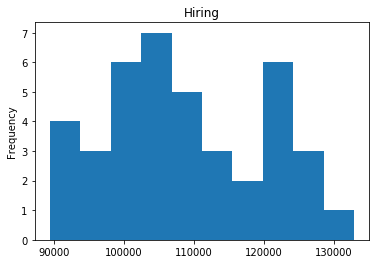

In [195]:
cew['Hiring'].plot(kind='hist' , title='Hiring')

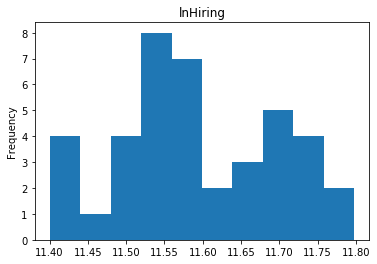

In [196]:
cew['lnHiring'].plot(kind='hist' , title='lnHiring')

In [197]:
print('#'*20,'1.Hiring Jarque-bera','#'*20)
name = ['Jarque-Bera']
jarque = sms.jarque_bera(reg1.resid)
lzip( name , jarque)

# lnwage 종속변수인 reg3 

reg2 = smf.ols('lnHiring ~ kosdaq + Stock + PER ',missing = 'drop', data = cew).fit()

print('#'*20,'2.log(Hiring) Jarque-bera','#'*20)
name = ['Jarque-Bera']
jarque = sms.jarque_bera(reg2.resid)
lzip( name , jarque)

print(reg2.summary())

#################### 1.Hiring Jarque-bera ####################


[('Jarque-Bera', 1.4755029780211752)]

#################### 2.log(Hiring) Jarque-bera ####################


[('Jarque-Bera', 2.1533787600364103)]

                            OLS Regression Results                            
Dep. Variable:               lnHiring   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     6.577
Date:                Mon, 13 Jul 2020   Prob (F-statistic):            0.00117
Time:                        22:20:57   Log-Likelihood:                 42.473
No. Observations:                  40   AIC:                            -76.95
Df Residuals:                      36   BIC:                            -70.19
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.4258      0.174     65.772      0.0

## 이분산

In [189]:
# BP Test
print('#'*20,'1.BP-Test','#'*20)
name = [ 'Lagrange_multiplier static','P-value']
BPtest = sms.het_breuschpagan(reg2.resid , reg2.model.exog)
lzip(name , BPtest)

# White Test 
print('#'*20,'2.White-Test','#'*20)
name = [ 'Lagrange_multiplier static','P-value']
WhiteTest = sms.het_white( reg2.resid , reg2.model.exog  ) # retres = False
lzip(name , WhiteTest)


#################### 1.BP-Test ####################


[('Lagrange_multiplier static', 4.193303961610431),
 ('P-value', 0.24133314119978896)]

#################### 2.White-Test ####################


[('Lagrange_multiplier static', 8.267816775404873),
 ('P-value', 0.5073984281646733)]

## 문제는 이분산이였다. 

In [200]:
reg3 = smf.ols('lnHiring ~ kosdaq + Stock + PER + Price',missing = 'drop', data = cew).fit(cov_type='HC1')
reg4 = smf.ols('Hiring ~  kosdaq + Stock + PER + Price' , missing = 'drop', data= cew).fit(cov_type='HC1')
reg7 = smf.ols('Hiring ~  kosdaq + Stock+  PER + Price' , missing = 'drop', data= cew).fit()
print(reg3.summary())
print(reg4.summary())
print(reg7.summary())

                            OLS Regression Results                            
Dep. Variable:               lnHiring   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     5.711
Date:                Mon, 13 Jul 2020   Prob (F-statistic):            0.00120
Time:                        22:23:29   Log-Likelihood:                 44.674
No. Observations:                  40   AIC:                            -79.35
Df Residuals:                      35   BIC:                            -70.90
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.3459      0.173     65.664      0.0

## 자기상관

In [191]:
name =['LM-stat', 'LM : P-value' , 'F-value' , ' F : P-value']
bg_t = sm_diagnostic.acorr_breusch_godfrey(reg3 , nlags=2 ) 
print( pd.DataFrame( lzip(name , bg_t) ) )

              0         1
0       LM-stat  1.386920
1  LM : P-value  0.499844
2       F-value  0.610613
3   F : P-value  0.548865


In [201]:
reg4_model = smf.ols('lnHiring ~ kosdaq  + Stock + PER' , missing='drop' , data=cew)
reg4_CORC = sm.GLSAR(reg4_model.endog, reg4_model.exog)

reg4_CORC_fit = reg4_CORC.iterative_fit(maxiter=100) # OLS fit() 
print(reg4_CORC_fit.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      y   R-squared:                       0.278
Model:                          GLSAR   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     4.495
Date:                Mon, 13 Jul 2020   Prob (F-statistic):            0.00904
Time:                        22:23:43   Log-Likelihood:                 42.311
No. Observations:                  39   AIC:                            -76.62
Df Residuals:                      35   BIC:                            -69.97
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4854      0.190     60.358      0.0

In [202]:
reg5 = smf.ols('lnHiring ~ kosdaq +  Stock + PER',missing = 'drop', data = cew).fit(cov_type='HC1')
print('모형설정오류 ',  oi.reset_ramsey(reg5 , degree=2))
print('모형설정오류 ',  oi.reset_ramsey(reg3 , degree=2))

모형설정오류  <F test: F=array([[6.19390962]]), p=0.017724189885302513, df_denom=35, df_num=1>
모형설정오류  <F test: F=array([[7.12578477]]), p=0.011564638833877898, df_denom=34, df_num=1>


In [175]:
np.log(1000)

6.907755278982137